In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Методика выполнения задания:**

# **Раздел 1. Загрузка данных и первичный анализ с использованием описательных статистик**

**1.	Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
from pandas import read_csv
from pandas import set_option
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split # разбивка выборки на части
from sklearn.linear_model import LogisticRegression # логистическая регрессия

from sklearn.model_selection import KFold # разбивка на фолды
from sklearn.model_selection import cross_val_score # для кросс валидации
from sklearn.model_selection import LeaveOneOut # оставляет одно значение для обученияб а остальные для тестов
from sklearn.model_selection import ShuffleSplit # случайная разбивка выборки на k частей
# функции для оценки качества данных:
from sklearn.metrics import confusion_matrix # сопоставляются расчетные значения
from sklearn.metrics import classification_report # тут разные показатели оценки
from sklearn.linear_model import LinearRegression # для оценки качества регрессии

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

**2.	Загрузите данные об ирисах из файла iris.data.csv с помощью функции read_csv() из модуля pandas. Названия столбцов укажите следующими: names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
filename='iris.data'
names=['sepal length','sepal width','petal length','petal width','class']
df=read_csv(filename,names=names)
df.sample(2)

,sepal length,sepal width,petal length,petal width,class
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


In [ ]:
df=df.rename(columns=lambda x: x.replace(' ','_'))
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
88,5.6,3.0,4.1,1.3,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa


**3. Посмотрите на размерность данных, обратившись к атрибуту shape.**

In [ ]:
df.shape

(150, 5)

**4.	Выведите на экран общую информацию о наборе данных с помощью функции info(). Прокомментируйте результат.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**5.	Установите точность вывода результатов до 3-х знаков после запятой с помощью функции set_option('precision', 3) из модуля pandas.**

In [ ]:
pd.set_option('precision', 3)

**6.	 Выведите на экран описательные статистики, воспользовавшись функцией describe(). Прокомментируйте результат.**

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


**7.	Выявите распределение данных по классам, воспользовавшись функцией groupby() для группировки данных по классам и функцией size() для подсчета количества наблюдений в каждом классе. Сделайте вывод о равномерности распределения данных по классам.**

In [ ]:
df.groupby(df['class']).size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

# **Раздел 2. Первичный анализ данных с использованием визуализации**

**8.	 Постройте гистограмму для всех признаков, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

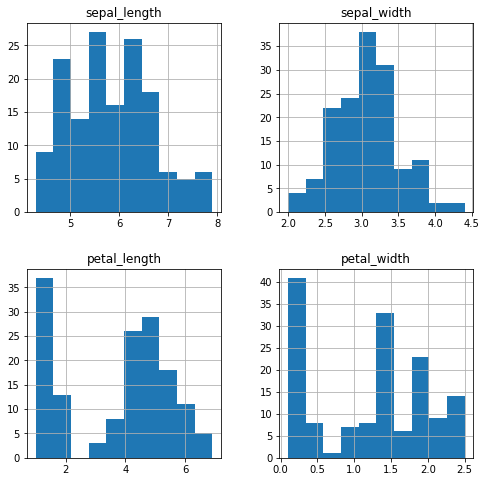

In [ ]:
df.hist(figsize=(8,8))
plt.show()

**9.	Постройте ящики с усами для всех признаков, воспользовавшись функцией plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

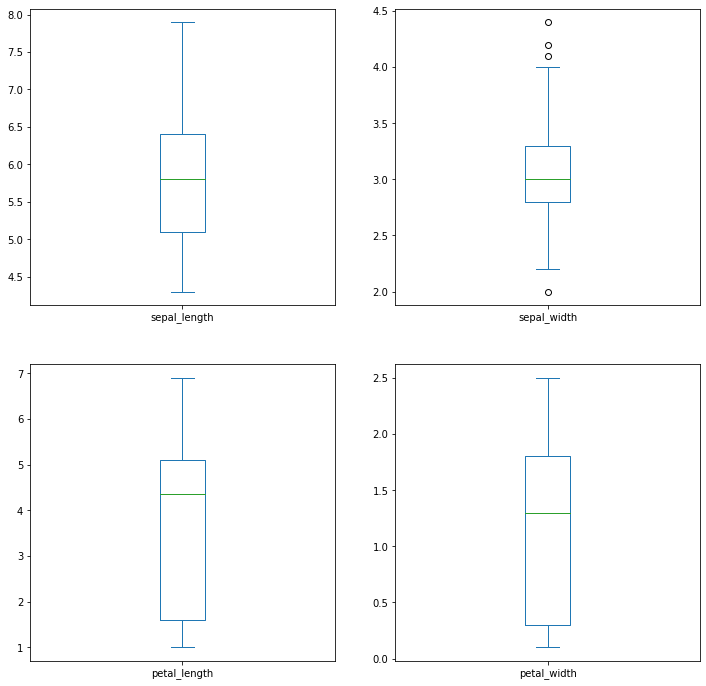

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12))
plt.show()

**10. Постройте диаграмму рассеяния, воспользовавшись функцией scatter_matrix() из модуля pandas.plotting и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc636ec50>,
      dtype=object)

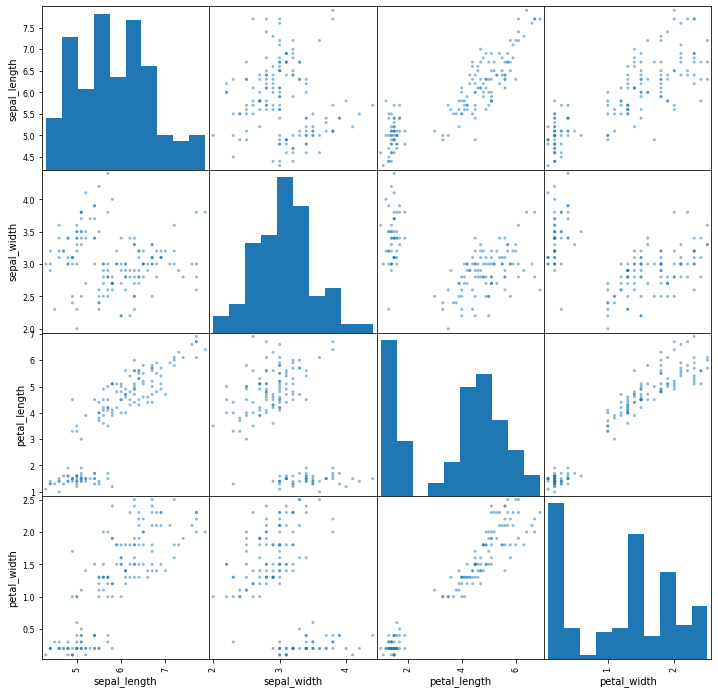

In [ ]:
scatter_matrix(df,figsize=(12,12))

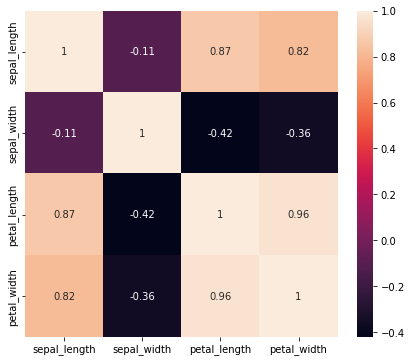

In [ ]:
fig=plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

# **Раздел 3. Выбор лучшего алгоритма машинного обучения для задачи классификации**

**11.	 Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

In [ ]:
array = df.values
array

**12. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.**

In [ ]:
X = array[:,0:4]
Y = array[:,4]

**13. Разбейте выборку на обучающий и тестовый набор с помощью функции train_test_split(X, Y, test_size= test_size, random_state= random_state) из модуля sklearn.model_selection. Пусть доля тестовой выборки (test_size) - 0,2. Счетчик случайных чисел (random_state) – пусть 7. Результат запишите в переменные X_train, X_test, Y_train, Y_test.**

In [ ]:
test_size = 0.2
seed = 7

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_size,random_state=seed)

**14. Создайте пустой список и запишите его в переменную models.**

In [ ]:
models=[]

**15. Добавьте в список models с помощью функции append() набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для классификации, рассмотренные в заданиях 7 и 8. Можно при этом воспользоваться следующими сокращениями:**

**LR – логистическая регрессия;**

**SVM – линейный метод опорных векторов;**

**LDA – линейный дискриминантный анализ;**

**KNN - модель ближайшего соседа;**

**NB - наивный байесовский классификатор;**

**CART - модель решающего дерева.**

In [ ]:
models.append(('LR',LogisticRegression(solver='liblinear')))

In [ ]:
models.append(('SVM',SVC(kernel='linear')))

In [ ]:
models.append(('LDA',LinearDiscriminantAnalysis()))

In [ ]:
models.append(('KNN',KNeighborsClassifier()))

In [ ]:
models.append(('NB',GaussianNB()))

In [ ]:
models.append(('CART',DecisionTreeClassifier()))

In [ ]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('SVM', SVC(kernel='linear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('CART', DecisionTreeClassifier())]

In [ ]:
results=[]
names=[]

In [ ]:
scoring='accuracy'

**16. Выведите на экран список названий моделей с соответствующими значениями средней доли правильных ответов и стандартного отклонения, рассчитанными на кросс-валидации.**

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  results.append(names)
  print(name, cv_results.mean(), cv_results.std())

LR 0.9533333333333334 0.08459051693633016
SVM 0.9733333333333334 0.03265986323710903
LDA 0.9800000000000001 0.030550504633038926
KNN 0.9533333333333334 0.052068331172711015
NB 0.9533333333333334 0.06699917080747259
CART 0.9466666666666667 0.06531972647421806


**17. Изобразите результаты предыдущих расчетов в виде ящика с усами.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


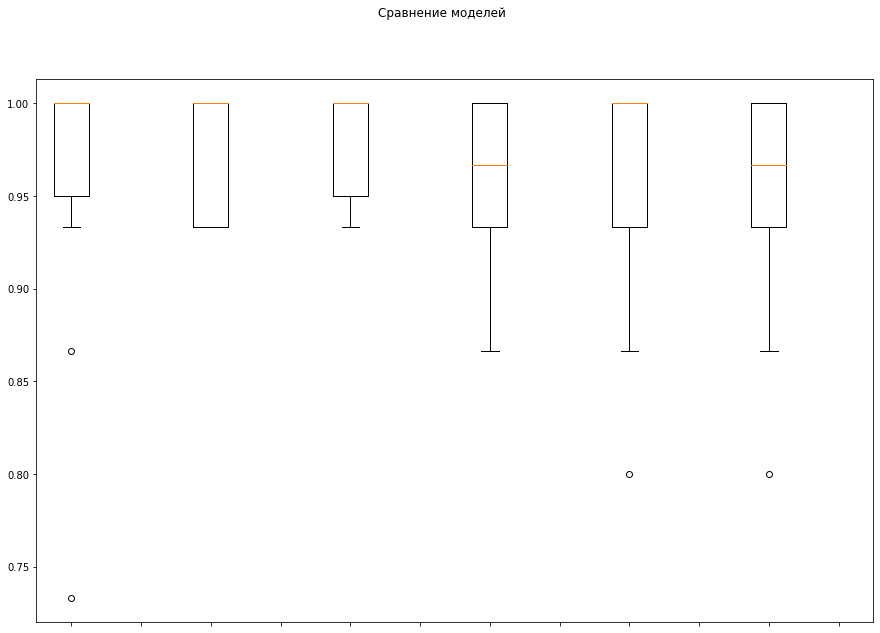

In [ ]:
fig=pyplot.figure(figsize=(15,10))
fig.suptitle('Сравнение моделей')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**18.  Выберите лучшую модель. Обоснуйте свой выбор.**

In [ ]:
Выбираю модель 'LDA', т.к.